# Texture features

## Gray level co-occurrence matrix (glcm)

* The GLCM is created by quantifying how often pixel pairs with specific gray levels occur at a given distance and direction.
* Commonly used distances in GLCM calculations include 1 pixel (adjacent) or greater distances depending on the application.
* The resulting matrix can be used to calculate various texture features like contrast, homogeneity, entropy, and correlation.
n.

The GLCM is a square matrix where both the rows and columns represent the range of possible pixel values (e.g., 0-255 for an 8-bit image). 

Each element ((i, j)) in the matrix represents the frequency with which the pixel with value (i) occurs adjacent to a pixel with value (j) in the specified spatial relationship.

Traverse through the image and for each pixel, look at its neighbor defined by the spatial relationship. Increment the corresponding element in the GLCM. For example, if a pixel with value 10 is next to a pixel with value 20, increment the ((10, 20)) element of the matrix.

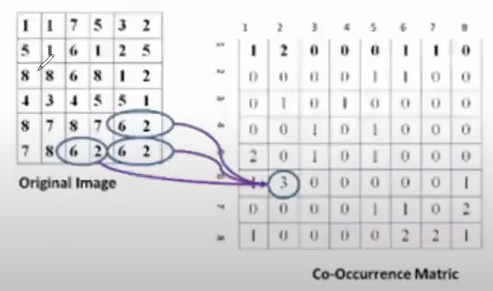


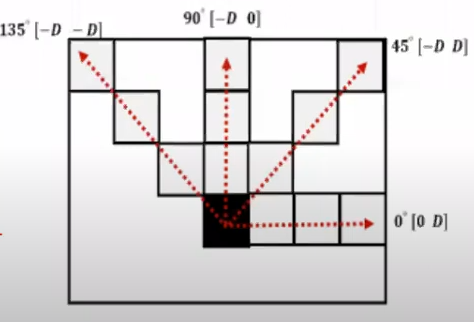

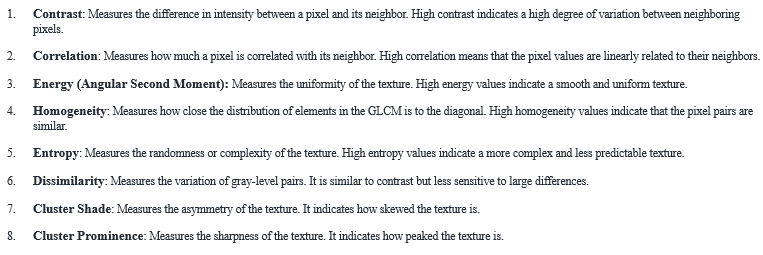

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.util import img_as_ubyte
from skimage.feature import graycomatrix, graycoprops

image = io.imread('/kaggle/input/monkeypox-skin-lesion-dataset/Original Images/Original Images/Monkey Pox/M01_01.jpg', as_gray=True)
# Convert image to unsigned 8-bit integer type (ValueError: Float images are not supported by graycomatrix. Convert the image to an unsigned integer type.)
image = img_as_ubyte(image)

# Compute the GLCM
glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Compute properties
contrast = graycoprops(glcm, prop='contrast')
energy = graycoprops(glcm, prop='energy')
homogeneity = graycoprops(glcm, prop='homogeneity')
correlation = graycoprops(glcm, prop='correlation')

print(f"Contrast: {contrast[0][0]}, Energy: {energy[0][0]}, Homogeneity: {homogeneity[0][0]}, Correlation: {correlation[0][0]}")

Contrast: 9.444226457399102, Energy: 0.03846705197104655, Homogeneity: 0.3905890452496836, Correlation: 0.9924222752613931


## Gray-Level Run-Length Matrix (GLRM)

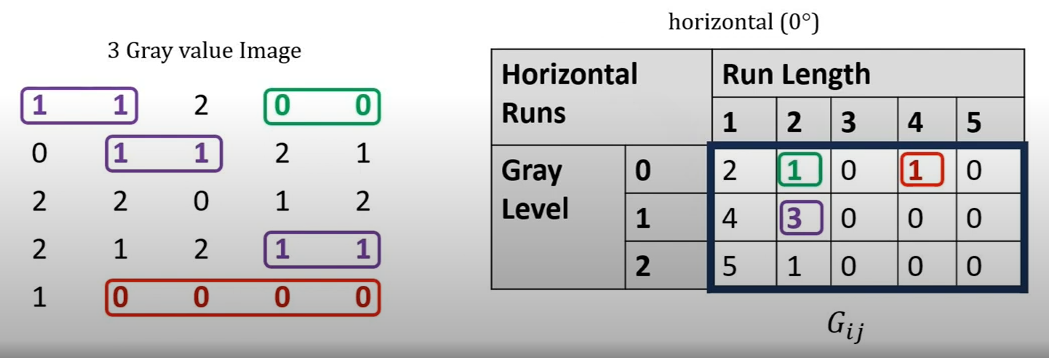

#### i didn't find a built-in function to calculte (GLRM), so i create a custom implementation   

    Compute the Gray-Level Run-Length Matrix (GLRM) for a given image.
    
    Parameters:
    - image: 2D numpy array representing the grayscale image.
    - direction: Direction of the runs ('horizontal', 'vertical', 'diagonal', 'anti-diagonal').
    
    Returns:
    - glrm_matrix: 2D numpy array representing the GLRM.

In [26]:
def GLRM(image, direction='horizontal'):
    max_gray_level = image.max() + 1
    max_run_length = max(image.shape)
    glrm_matrix = np.zeros((max_gray_level, max_run_length), dtype=int)
    
    if direction == 'horizontal':
        for row in image:
            run_length = 1
            for i in range(1, len(row)):
                if row[i] == row[i - 1]:
                    run_length += 1
                else:
                    glrm_matrix[row[i - 1], run_length - 1] += 1
                    run_length = 1
            glrm_matrix[row[-1], run_length - 1] += 1
    
    elif direction == 'vertical':
        for col in image.T:
            run_length = 1
            for i in range(1, len(col)):
                if col[i] == col[i - 1]:
                    run_length += 1
                else:
                    glrm_matrix[col[i - 1], run_length - 1] += 1
                    run_length = 1
            glrm_matrix[col[-1], run_length - 1] += 1
    
    elif direction == 'diagonal':
        for offset in range(-image.shape[0] + 1, image.shape[1]):
            diag = np.diagonal(image, offset=offset)
            run_length = 1
            for i in range(1, len(diag)):
                if diag[i] == diag[i - 1]:
                    run_length += 1
                else:
                    glrm_matrix[diag[i - 1], run_length - 1] += 1
                    run_length = 1
            if len(diag) > 0:
                glrm_matrix[diag[-1], run_length - 1] += 1
    
    elif direction == 'anti-diagonal':
        flipped_image = np.fliplr(image)
        for offset in range(-flipped_image.shape[0] + 1, flipped_image.shape[1]):
            diag = np.diagonal(flipped_image, offset=offset)
            run_length = 1
            for i in range(1, len(diag)):
                if diag[i] == diag[i - 1]:
                    run_length += 1
                else:
                    glrm_matrix[diag[i - 1], run_length - 1] += 1
                    run_length = 1
            if len(diag) > 0:
                glrm_matrix[diag[-1], run_length - 1] += 1
    
    return glrm_matrix


The Gray-Level Run-Length Matrix (GLRM) provides several features that can be extracted to analyze the texture of an image.
> common features:

> 1. **Short Run Emphasis (SRE)**: Measures the distribution of short runs.
> 2. **Long Run Emphasis (LRE)**:  Measures the distribution of long runs.
> 3. **Gray-Level Non-Uniformity (GLN)**: Measures the similarity of gray-level values.
> 4. **Run Length Non-Uniformity (RLN)**: Measures the similarity of run lengths.
> 5. **Run Percentage (RP)**: Measures the homogeneity and the distribution of runs.
> 6. **Low Gray-Level Run Emphasis (LGRE)**: Measures the distribution of low gray-level runs.
> 7. **High Gray-Level Run Emphasis (HGRE)**: Measures the distribution of high gray-level runs.
> 8. **Short Run Low Gray-Level Emphasis (SRLGE)**: Measures the distribution of short runs with low gray-level values.
> 9. **Short Run High Gray-Level Emphasis (SRHGE)**: Measures the distribution of short runs with high gray-level values.
> 10. **Long Run Low Gray-Level Emphasis (LRLGE)**: Measures the distribution of long runs with low gray-level values.
> 11. **Long Run High Gray-Level Emphasis (LRHGE)**: Measures the distribution of long runs with high gray-level values.

In [27]:
def compute_glrm_features(glrm):
    N_g, N_r = glrm.shape
    N = np.sum(glrm)
    
    SRE = np.sum(glrm / (np.arange(1, N_r + 1) ** 2), axis=1).sum() / N
    LRE = np.sum(glrm * (np.arange(1, N_r + 1) ** 2), axis=1).sum() / N
    GLN = np.sum(np.sum(glrm, axis=1) ** 2) / N
    RLN = np.sum(np.sum(glrm, axis=0) ** 2) / N
    RP = N / (N_g * N_r)
    LGRE = np.sum(glrm / (np.arange(1, N_g + 1)[:, None] ** 2), axis=0).sum() / N
    HGRE = np.sum(glrm * (np.arange(1, N_g + 1)[:, None] ** 2), axis=0).sum() / N
    SRLGE = np.sum(glrm / ((np.arange(1, N_g + 1)[:, None] ** 2) * (np.arange(1, N_r + 1) ** 2)), axis=1).sum() / N
    SRHGE = np.sum(glrm * (np.arange(1, N_g + 1)[:, None] ** 2) / (np.arange(1, N_r + 1) ** 2), axis=1).sum() / N
    LRLGE = np.sum(glrm * (np.arange(1, N_r + 1) ** 2) / (np.arange(1, N_g + 1)[:, None] ** 2), axis=0).sum() / N
    LRHGE = np.sum(glrm * (np.arange(1, N_g + 1)[:, None] ** 2) * (np.arange(1, N_r + 1) ** 2), axis=1).sum() / N
    
    features = {
        'SRE': SRE,
        'LRE': LRE,
        'GLN': GLN,
        'RLN': RLN,
        'RP': RP,
        'LGRE': LGRE,
        'HGRE': HGRE,
        'SRLGE': SRLGE,
        'SRHGE': SRHGE,
        'LRLGE': LRLGE,
        'LRHGE': LRHGE
    }
    
    return features

In [28]:
import os
import pandas as pd
from skimage.feature import local_binary_pattern

def extract_features(image):
    # Compute the GLCM
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    # GLCM features
    contrast = graycoprops(glcm, prop='contrast')[0][0]
    energy = graycoprops(glcm, prop='energy')[0][0]
    homogeneity = graycoprops(glcm, prop='homogeneity')[0][0]
    correlation = graycoprops(glcm, prop='correlation')[0][0]
    
    # GLRM features
    glrm = GLRM(image, direction='horizontal')
    glrm_features = compute_glrm_features(glrm)
    
    # LBP features
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 11), range=(0, 10), density=True)
    
    features = {
        'contrast': contrast,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation,
        **glrm_features
        #**{f'lbp_{i}': lbp_hist[i] for i in range(len(lbp_hist))}
    }
    
    return features

def extract_features_from_directory(directory_path, label):
    data = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory_path, filename)
            image = io.imread(image_path,as_gray=True)
            image = img_as_ubyte(image)
            features = extract_features(image)
            features['Label'] = label
            data.append(features)
    
    df = pd.DataFrame(data)
    return df

In [29]:
directory_path = '/kaggle/input/monkeypox-skin-lesion-dataset/Original Images/Original Images/Monkey Pox'
data_M = extract_features_from_directory(directory_path, 1)
data_M

,contrast,homogeneity,energy,correlation,SRE,LRE,GLN,RLN,RP,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,Label
0,12.162116,0.381083,0.037388,0.988765,0.881241,1.842590,513.517687,30430.037116,0.724037,0.000094,13003.720192,0.000083,11531.936405,0.000176,23349.856300,1
1,19.906370,0.367298,0.026628,0.996070,0.888599,2.000973,255.286785,30894.566491,0.716919,0.000111,18120.622777,0.000098,15953.926510,0.000245,40074.772445,1
2,16.588705,0.401808,0.040237,0.990924,0.868496,1.961688,460.832553,28854.957596,0.854153,0.000043,27616.356639,0.000038,23709.410077,0.000081,57039.635422,1
3,25.733164,0.346249,0.031399,0.988674,0.894908,1.688608,400.261855,32369.709058,0.866214,0.000058,25400.945520,0.000053,22518.321902,0.000092,44485.152566,1
4,216.816964,0.286421,0.034516,0.974769,0.914394,1.936795,267.225679,34367.037652,0.749527,0.016541,11852.236050,0.011216,10679.467471,0.162754,21780.711910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,131.267537,0.268395,0.064838,0.987932,0.931881,4.309383,256.994685,35130.386980,0.767324,0.000283,25943.684440,0.000202,24659.809560,0.010682,33465.916633,1
98,46.898082,0.335016,0.024071,0.994286,0.896858,1.897497,204.843530,32184.698445,0.749804,0.004197,18902.178332,0.001909,17047.714223,0.125923,31129.259901,1
99,4.294563,0.611090,0.061832,0.995450,0.735887,4.269972,458.123234,15619.514706,0.576912,0.000035,30370.390027,0.000027,22004.914128,0.000140,139715.284517,1
100,31.228980,0.261572,0.026478,0.978931,0.925323,1.420258,480.504181,36928.380081,0.866786,0.000053,22467.285345,0.000049,20860.000571,0.000077,31341.024236,1


In [30]:
directory_path = '/kaggle/input/monkeypox-skin-lesion-dataset/Original Images/Original Images/Others'
data_other = extract_features_from_directory(directory_path, 0)
data_other

,contrast,homogeneity,energy,correlation,SRE,LRE,GLN,RLN,RP,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,Label
0,37.690303,0.224174,0.023933,0.980920,0.939033,1.385235,476.567713,38989.915498,0.976482,0.000063,22047.473149,0.000059,20658.060530,0.000085,31943.998884,0
1,50.066464,0.199249,0.023005,0.964693,0.946294,1.253615,504.001783,40414.071317,0.834391,0.000039,28404.677432,0.000037,26823.579047,0.000049,35894.278154,0
2,63.436019,0.199633,0.024901,0.945852,0.945222,1.273421,561.783889,40179.451799,0.828196,0.000028,37866.203929,0.000027,35761.952349,0.000036,48345.431833,0
3,10.908832,0.423169,0.041946,0.986439,0.858475,2.088879,554.995971,27541.427323,1.030861,0.000124,9636.018078,0.000106,8328.909017,0.000265,19716.695294,0
4,43.095932,0.289605,0.025696,0.989533,0.913600,1.533715,332.460379,35052.685221,0.851184,0.000127,23638.812464,0.000121,21090.011994,0.000158,40363.558092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,3.812360,0.552383,0.051895,0.996382,0.782559,3.181435,427.000988,19555.047255,0.698235,0.000041,26535.539045,0.000033,20375.701017,0.000121,90805.174518,0
122,160.673707,0.282593,0.019724,0.975513,0.918346,1.601743,221.995689,35500.049018,0.792384,0.000249,19084.478684,0.000226,17423.331639,0.000457,31262.256700,0
123,47.946188,0.246433,0.023207,0.981942,0.929809,1.421155,403.602069,37527.349394,0.785400,0.000043,30911.786758,0.000040,28765.478436,0.000060,43566.757183,0
124,49.601137,0.632557,0.070124,0.979862,0.738029,6.534032,368.840335,14449.294325,0.499355,0.000072,19158.032233,0.000053,14869.602421,0.000448,111913.783726,0


In [31]:
data = pd.concat([data_other,data_M]).reset_index(drop=True)
data

,contrast,homogeneity,energy,correlation,SRE,LRE,GLN,RLN,RP,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,Label
0,37.690303,0.224174,0.023933,0.980920,0.939033,1.385235,476.567713,38989.915498,0.976482,0.000063,22047.473149,0.000059,20658.060530,0.000085,31943.998884,0
1,50.066464,0.199249,0.023005,0.964693,0.946294,1.253615,504.001783,40414.071317,0.834391,0.000039,28404.677432,0.000037,26823.579047,0.000049,35894.278154,0
2,63.436019,0.199633,0.024901,0.945852,0.945222,1.273421,561.783889,40179.451799,0.828196,0.000028,37866.203929,0.000027,35761.952349,0.000036,48345.431833,0
3,10.908832,0.423169,0.041946,0.986439,0.858475,2.088879,554.995971,27541.427323,1.030861,0.000124,9636.018078,0.000106,8328.909017,0.000265,19716.695294,0
4,43.095932,0.289605,0.025696,0.989533,0.913600,1.533715,332.460379,35052.685221,0.851184,0.000127,23638.812464,0.000121,21090.011994,0.000158,40363.558092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,131.267537,0.268395,0.064838,0.987932,0.931881,4.309383,256.994685,35130.386980,0.767324,0.000283,25943.684440,0.000202,24659.809560,0.010682,33465.916633,1
224,46.898082,0.335016,0.024071,0.994286,0.896858,1.897497,204.843530,32184.698445,0.749804,0.004197,18902.178332,0.001909,17047.714223,0.125923,31129.259901,1
225,4.294563,0.611090,0.061832,0.995450,0.735887,4.269972,458.123234,15619.514706,0.576912,0.000035,30370.390027,0.000027,22004.914128,0.000140,139715.284517,1
226,31.228980,0.261572,0.026478,0.978931,0.925323,1.420258,480.504181,36928.380081,0.866786,0.000053,22467.285345,0.000049,20860.000571,0.000077,31341.024236,1


In [8]:
data_M.describe()

,contrast,homogeneity,energy,correlation,SRE,LRE,GLN,RLN,RP,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,label
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,49.723139,0.353037,0.039234,0.982554,0.885050,2.269655,447.961148,31371.060945,0.802725,0.001238,19688.422532,0.000680,17162.381692,0.144467,47353.631972,0.0
std,62.383963,0.116395,0.020690,0.019221,0.056931,1.260134,221.398980,6778.395025,0.121608,0.003745,9158.834695,0.001876,7293.359447,0.736522,51081.949856,0.0
min,1.796745,0.146048,0.015497,0.901322,0.677221,1.176830,190.714620,11816.515081,0.502720,0.000021,4350.846298,0.000016,4197.064205,0.000038,5120.486158,0.0
25%,11.987223,0.267768,0.026664,0.980262,0.868408,1.547391,300.765887,28290.660865,0.728272,0.000057,12890.115575,0.000049,11374.475779,0.000105,20471.967085,0.0
50%,22.467229,0.335582,0.033694,0.988890,0.897738,1.813624,408.470237,32613.736783,0.796554,0.000098,18551.528323,0.000087,16359.538748,0.000215,32570.594742,0.0
75%,63.060198,0.405508,0.043900,0.993850,0.923109,2.401150,517.648126,35706.862732,0.872197,0.000266,23082.875726,0.000238,20818.216507,0.000617,46258.338089,0.0
max,322.406650,0.664317,0.136634,0.999244,0.960730,8.138744,1398.511967,42851.613433,1.243567,0.018595,48996.876760,0.011216,39155.358919,6.254545,275604.406150,0.0


In [9]:
data_other.describe()

,contrast,homogeneity,energy,correlation,SRE,LRE,GLN,RLN,RP,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,label
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0
mean,34.363262,0.374417,0.041990,0.977691,0.871833,2.586863,524.661914,30155.648243,0.803207,0.000169,25108.051745,0.000128,21816.789980,0.001153,72226.396198,1.0
std,67.586698,0.137410,0.020603,0.041696,0.072040,2.203666,258.104991,8234.317129,0.153326,0.000591,9011.891927,0.000408,7885.271616,0.005693,104492.796849,0.0
min,1.462344,0.054766,0.011660,0.569744,0.562246,1.055152,185.419866,6582.075515,0.405673,0.000021,3054.011414,0.000016,2456.247136,0.000032,8471.012621,1.0
25%,9.921515,0.270350,0.026939,0.977997,0.829829,1.455796,369.543758,24028.284963,0.727754,0.000039,18407.169783,0.000033,16852.585197,0.000078,31292.324793,1.0
50%,22.685218,0.346575,0.036103,0.988129,0.895518,1.776156,474.390189,32526.584780,0.808768,0.000056,25355.452658,0.000047,20991.436970,0.000119,46760.444376,1.0
75%,38.950918,0.481092,0.051485,0.992420,0.923194,2.638409,644.671487,36533.469577,0.868890,0.000101,31070.042746,0.000089,27497.987157,0.000226,69317.110009,1.0
max,706.791099,0.758242,0.112452,0.999106,0.986607,12.825022,1775.456225,47558.653707,1.572993,0.006284,48334.371219,0.004431,43382.232273,0.047604,804057.317193,1.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   contrast     228 non-null    float64
 1   homogeneity  228 non-null    float64
 2   energy       228 non-null    float64
 3   correlation  228 non-null    float64
 4   SRE          228 non-null    float64
 5   LRE          228 non-null    float64
 6   GLN          228 non-null    float64
 7   RLN          228 non-null    float64
 8   RP           228 non-null    float64
 9   LGRE         228 non-null    float64
 10  HGRE         228 non-null    float64
 11  SRLGE        228 non-null    float64
 12  SRHGE        228 non-null    float64
 13  LRLGE        228 non-null    float64
 14  LRHGE        228 non-null    float64
 15  label        228 non-null    int64  
dtypes: float64(15), int64(1)
memory usage: 28.6 KB


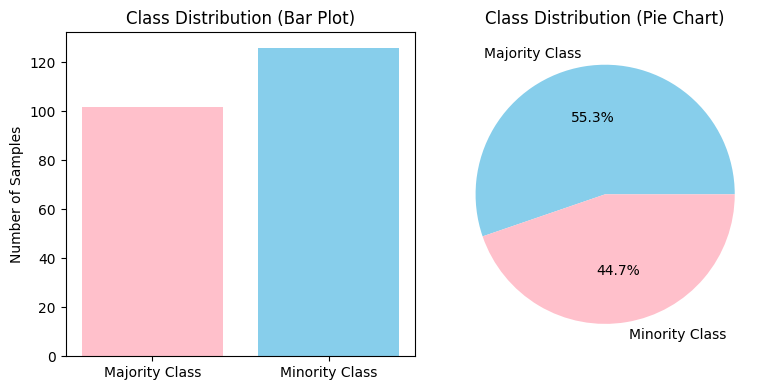

In [12]:
# Count the number of samples in each class
class_counts = data['label'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart
ax[1].pie(class_counts, labels=['Majority Class', 'Minority Class'], autopct='%1.1f%%', colors=['skyblue', 'pink'])
ax[1].set_title('Class Distribution (Pie Chart)')

# Bar plot
ax[0].bar(class_counts.index, class_counts, color=['skyblue', 'pink'])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Majority Class', 'Minority Class'])
ax[0].set_title('Class Distribution (Bar Plot)')
ax[0].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(y_test, y_pred, display_labels=['Class 0', 'Class 1']):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate Sensitivity (Recall)
    sensitivity = TP / (TP + FN)
    sensitivity = round(sensitivity, 3)
    print(f'Sensitivity (Recall): {sensitivity}')
    
    # Calculate Specificity
    specificity = TN / (TN + FP)
    specificity = round(specificity, 3)
    print(f'Specificity: {specificity}')
    
    # Calculate Positive Predictive Value (PPV)
    ppv = TP / (TP + FP)
    ppv = round(ppv, 3)
    print(f'Positive Predictive Value (PPV): {ppv}')
    
    # Calculate Negative Predictive Value (NPV)
    npv = TN / (TN + FN)
    npv = round(npv, 3)
    print(f'Negative Predictive Value (NPV): {npv}')

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [35]:
data1 = data.copy().sample(frac=1).reset_index(drop=True)
data1

,contrast,homogeneity,energy,correlation,SRE,LRE,GLN,RLN,RP,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,Label
0,6.752602,0.478353,0.091721,0.964056,0.828386,2.473568,1678.078086,24096.792854,0.708013,0.000021,48334.371219,0.000017,39814.324357,0.000050,122409.949185,0
1,10.654228,0.505729,0.053000,0.984547,0.819161,2.631499,588.065253,23032.695665,0.673211,0.000088,12854.151026,0.000072,10574.470118,0.000230,33444.829950,0
2,12.692465,0.340370,0.032908,0.996645,0.896344,1.735382,448.068903,32528.176780,0.788511,0.001976,33786.305918,0.000835,30276.818914,0.047604,54450.546621,0
3,25.733164,0.346249,0.031399,0.988674,0.894908,1.688608,400.261855,32369.709058,0.866214,0.000058,25400.945520,0.000053,22518.321902,0.000092,44485.152566,1
4,4.294563,0.611090,0.061832,0.995450,0.735887,4.269972,458.123234,15619.514706,0.576912,0.000035,30370.390027,0.000027,22004.914128,0.000140,139715.284517,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,18.405910,0.269457,0.026598,0.988217,0.921204,1.403946,449.070345,36466.242189,0.793793,0.000030,36192.521670,0.000028,33304.340934,0.000043,50983.713288,0
224,63.445788,0.403843,0.053256,0.989264,0.877591,4.244059,214.161826,26698.701210,0.667989,0.000464,18645.263779,0.000349,17340.920757,0.002219,39579.447057,0
225,32.285955,0.253757,0.021552,0.988746,0.928725,1.390375,335.962206,37473.042072,0.786708,0.000084,18210.049963,0.000077,16945.913971,0.000125,25022.056458,1
226,95.081178,0.373443,0.099015,0.991671,0.896773,8.138744,224.745416,29258.988968,0.666492,0.018092,14590.798450,0.008250,13753.812642,6.254545,19374.881035,1


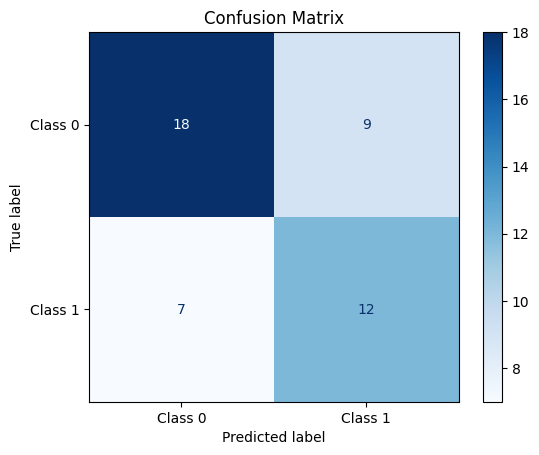

Sensitivity (Recall): 0.632
Specificity: 0.667
Positive Predictive Value (PPV): 0.571
Negative Predictive Value (NPV): 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        27
           1       0.57      0.63      0.60        19

    accuracy                           0.65        46
   macro avg       0.65      0.65      0.65        46
weighted avg       0.66      0.65      0.65        46

Accuracy: 0.6521739130434783


In [36]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data1, test_size=0.2, random_state=42, stratify=data['Label'])
X_train = df_train.drop('Label', axis=1)
y_train = df_train['Label']

X_test = df_test.drop('Label', axis=1)
y_test = df_test['Label']

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test,y_pred_svm)

## Univariante selection
### Filter method
Select K Best Features

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
X = data.iloc[:,0:15]  #independent columns
Y = data.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

In [38]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,contrast,0.474065
1,homogeneity,0.118122
2,energy,0.117722
3,correlation,0.007568
4,SRE,0.073545
5,LRE,0.346737
6,GLN,0.683959
7,RLN,0.084259
8,RP,0.000028
9,LGRE,5.530055


In [39]:
print(featureScores.nlargest(15,'Score'))  #print k best features

          Specs     Score
9          LGRE  5.530055
11        SRLGE  4.262036
13        LRLGE  2.837528
10         HGRE  1.835897
12        SRHGE  1.726889
14        LRHGE  0.779739
6           GLN  0.683959
0      contrast  0.474065
5           LRE  0.346737
1   homogeneity  0.118122
2        energy  0.117722
7           RLN  0.084259
4           SRE  0.073545
3   correlation  0.007568
8            RP  0.000028


In [63]:
data_filtered = data.drop(columns=['RP','correlation','SRE','RLN']).sample(frac=1).reset_index(drop=True)
data_filtered

,contrast,homogeneity,energy,LRE,GLN,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,Label
0,0.014615,0.503677,0.223775,0.078506,0.195878,0.002013,0.391737,0.003144,0.385773,0.000013,0.046052,0.0
1,0.021568,0.547418,0.259013,0.133978,0.076738,0.009491,0.230575,0.014531,0.217821,0.000051,0.045067,1.0
2,0.079297,0.302489,0.064525,0.041410,0.051801,0.004971,0.306867,0.007793,0.329507,0.000024,0.025557,1.0
3,0.051121,0.468191,0.122723,0.108365,0.045859,0.003797,0.344905,0.005646,0.345486,0.000029,0.047718,1.0
4,0.006858,0.584475,0.422363,0.117929,0.542765,0.001086,0.477772,0.001670,0.452650,0.000011,0.070263,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.040449,0.813044,0.676268,0.528320,0.240622,0.001996,0.428299,0.002574,0.372305,0.000053,0.188905,0.0
224,0.141124,0.184861,0.045731,0.021083,0.083000,0.015064,0.159755,0.022526,0.184702,0.000100,0.008828,1.0
225,0.006366,0.611937,0.346046,0.128265,0.321968,0.001459,0.417562,0.002174,0.388496,0.000014,0.067134,0.0
226,0.014885,0.456513,0.143822,0.068664,0.101257,0.021198,0.090873,0.029860,0.095410,0.000164,0.013079,1.0


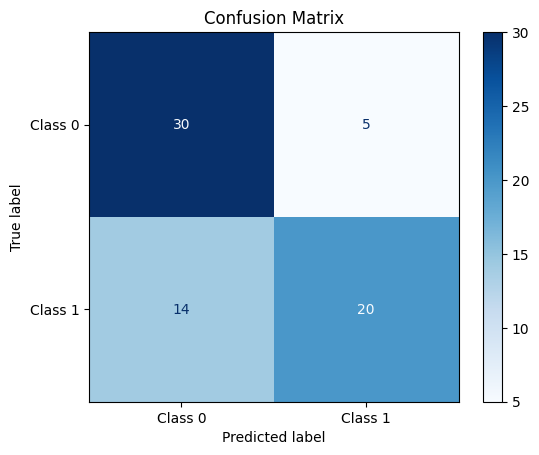

Sensitivity (Recall): 0.588
Specificity: 0.857
Positive Predictive Value (PPV): 0.8
Negative Predictive Value (NPV): 0.682
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76        35
         1.0       0.80      0.59      0.68        34

    accuracy                           0.72        69
   macro avg       0.74      0.72      0.72        69
weighted avg       0.74      0.72      0.72        69

Accuracy: 0.7246376811594203


In [64]:
df_train, df_test = train_test_split(data_filtered, test_size=0.3, random_state=42, stratify=data['Label'])
X_train = df_train.drop('Label', axis=1)
y_train = df_train['Label']

X_test = df_test.drop('Label', axis=1)
y_test = df_test['Label']

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test,y_pred_svm)

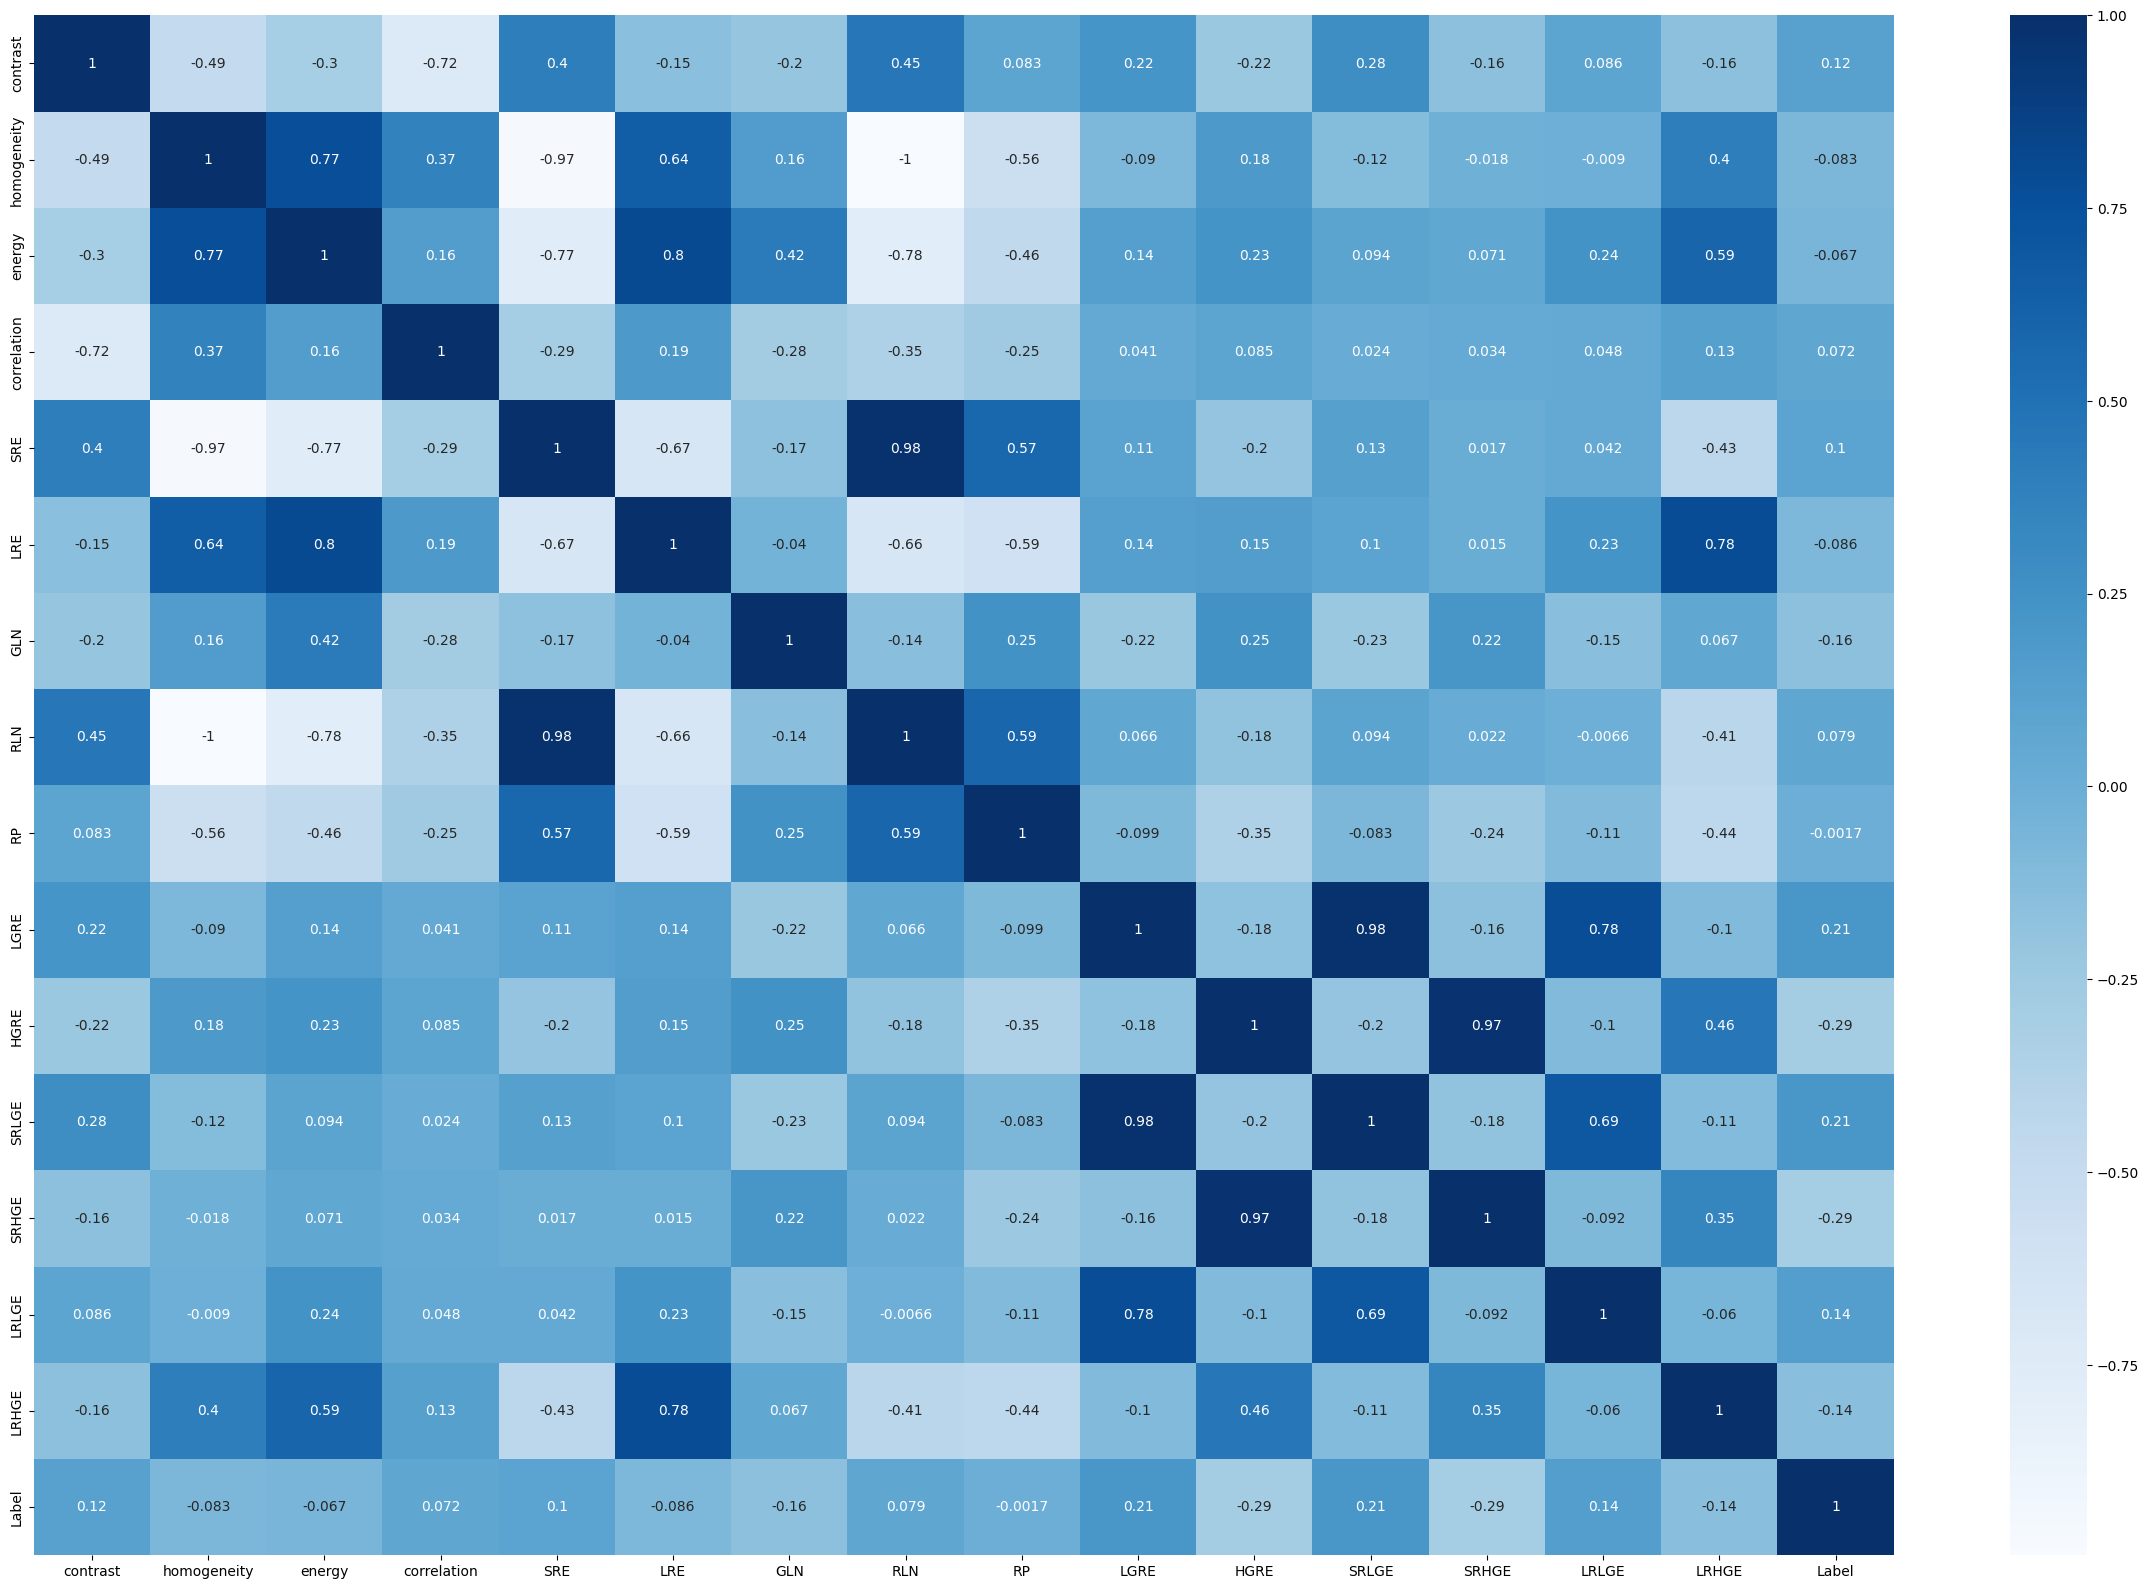

In [65]:
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Blues")

In [66]:
def extract_highly_correlated_features(corr_matrix, threshold=0.8):
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

# Extract highly correlated features
highly_correlated_features = extract_highly_correlated_features(corrmat, threshold=0.8)
print("Highly Correlated Features:", highly_correlated_features)


Highly Correlated Features: ['LRE', 'RLN', 'SRLGE', 'SRHGE']


In [70]:
data_filtered = data_filtered.drop(columns=['LRE', 'SRLGE', 'SRHGE'])
data_filtered

,contrast,homogeneity,energy,GLN,LGRE,HGRE,LRLGE,LRHGE,Label
0,0.014615,0.503677,0.223775,0.195878,0.002013,0.391737,0.000013,0.046052,0.0
1,0.021568,0.547418,0.259013,0.076738,0.009491,0.230575,0.000051,0.045067,1.0
2,0.079297,0.302489,0.064525,0.051801,0.004971,0.306867,0.000024,0.025557,1.0
3,0.051121,0.468191,0.122723,0.045859,0.003797,0.344905,0.000029,0.047718,1.0
4,0.006858,0.584475,0.422363,0.542765,0.001086,0.477772,0.000011,0.070263,1.0
...,...,...,...,...,...,...,...,...,...
223,0.040449,0.813044,0.676268,0.240622,0.001996,0.428299,0.000053,0.188905,0.0
224,0.141124,0.184861,0.045731,0.083000,0.015064,0.159755,0.000100,0.008828,1.0
225,0.006366,0.611937,0.346046,0.321968,0.001459,0.417562,0.000014,0.067134,0.0
226,0.014885,0.456513,0.143822,0.101257,0.021198,0.090873,0.000164,0.013079,1.0


In [73]:
data_filtered = data_filtered.sample(frac=1).reset_index(drop=True)

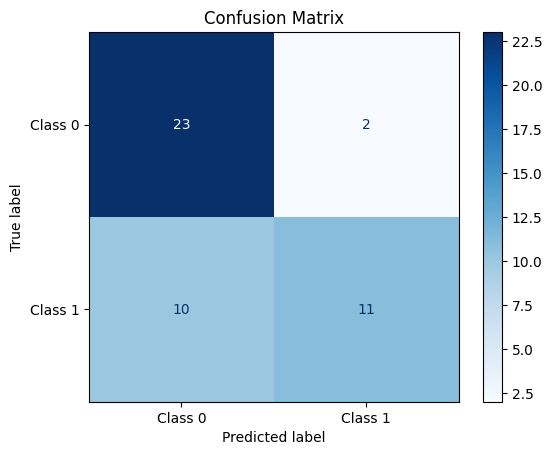

Sensitivity (Recall): 0.524
Specificity: 0.92
Positive Predictive Value (PPV): 0.846
Negative Predictive Value (NPV): 0.697
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.92      0.79        25
         1.0       0.85      0.52      0.65        21

    accuracy                           0.74        46
   macro avg       0.77      0.72      0.72        46
weighted avg       0.77      0.74      0.73        46

Accuracy: 0.7391304347826086


In [74]:
df_train, df_test = train_test_split(data_filtered, test_size=0.2, random_state=42, stratify=data['Label'])
X_train = df_train.drop('Label', axis=1)
y_train = df_train['Label']

X_test = df_test.drop('Label', axis=1)
y_test = df_test['Label']

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test,y_pred_svm)

### combine texture, shape and color features

In [76]:
features = pd.read_csv('/kaggle/input/e-c-features/data.csv').drop(columns=['Image Name', 'Label','num_circles','num_edges','mean_R','std_R','std_G','skew_G','mean_B','skew_B'])
features

,skew_R,mean_G,std_B
0,-0.053462,121.277762,39.876822
1,0.947466,135.500996,13.987239
2,-0.632141,169.680664,5.090706
3,1.542661,63.383988,21.025813
4,0.418112,118.166394,44.272979
...,...,...,...
223,0.506205,117.015804,93.989819
224,0.868362,107.464385,65.331566
225,-0.000429,154.399135,6.264777
226,0.411215,115.993662,25.413178


In [77]:
Data = pd.concat([features,data], axis=1).reset_index(drop=True)

,skew_R,mean_G,std_B,contrast,homogeneity,energy,correlation,SRE,LRE,GLN,RLN,RP,LGRE,HGRE,SRLGE,SRHGE,LRLGE,LRHGE,Label
0,-0.053462,121.277762,39.876822,0.051363,0.240816,0.098201,0.957337,0.887891,0.028045,0.183108,0.790887,0.488991,0.002271,0.413415,0.003865,0.444750,8.540139e-06,0.033574,0.0
1,0.947466,135.500996,13.987239,0.068910,0.205384,0.090777,0.919555,0.905003,0.016862,0.200361,0.825642,0.367267,0.001008,0.551787,0.001941,0.595400,2.749251e-06,0.038518,0.0
2,-0.632141,169.680664,5.090706,0.087865,0.205930,0.105952,0.875688,0.902477,0.018545,0.236702,0.819917,0.361960,0.000423,0.757728,0.001019,0.813803,6.777358e-07,0.054103,0.0
3,1.542661,63.383988,21.025813,0.013393,0.523690,0.242336,0.970186,0.698057,0.087828,0.232432,0.511496,0.535575,0.005583,0.143265,0.008061,0.143495,3.734330e-05,0.018270,0.0
4,0.418112,118.166394,44.272979,0.059027,0.333826,0.112311,0.977391,0.827960,0.040660,0.092476,0.694802,0.381653,0.005744,0.448052,0.009461,0.455304,2.019598e-05,0.044112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.506205,117.015804,93.989819,0.184035,0.303676,0.425511,0.973662,0.871039,0.276488,0.045015,0.696698,0.309814,0.014148,0.498220,0.016651,0.542530,1.702895e-03,0.035479,1.0
224,0.868362,107.464385,65.331566,0.064418,0.398379,0.099304,0.988457,0.788508,0.071568,0.012216,0.624811,0.294804,0.224877,0.344954,0.169044,0.356533,2.012801e-02,0.032554,1.0
225,-0.000429,154.399135,6.264777,0.004015,0.790821,0.401461,0.991167,0.409181,0.273140,0.171508,0.220551,0.146694,0.000802,0.594573,0.000991,0.477659,1.733823e-05,0.168467,1.0
226,0.411215,115.993662,25.413178,0.042202,0.293978,0.118568,0.952706,0.855584,0.031020,0.185583,0.740577,0.395019,0.001738,0.422553,0.002965,0.449684,7.179798e-06,0.032819,1.0


In [82]:
data_filtered

,contrast,homogeneity,energy,GLN,LGRE,HGRE,LRLGE,LRHGE,Label
0,0.220658,0.148358,0.081931,0.242997,0.002344,0.414937,7.104655e-06,0.026722,1.0
1,0.009194,0.592307,0.364288,0.358059,0.000836,0.561979,9.527204e-06,0.084905,0.0
2,0.040342,0.270301,0.217451,0.544034,0.000367,0.757767,8.408069e-07,0.058612,0.0
3,0.007048,0.627522,0.457381,0.525933,0.001952,0.328847,1.736348e-05,0.050325,0.0
4,0.025289,0.341222,0.128508,0.138963,0.001489,0.630086,5.850686e-06,0.055937,0.0
...,...,...,...,...,...,...,...,...,...
223,0.107930,0.263693,0.073426,0.076852,0.135413,0.161576,4.893656e-03,0.010062,1.0
224,0.013004,0.614387,0.437142,0.332508,0.000964,0.539037,9.676402e-06,0.092446,0.0
225,0.007182,0.554726,0.220941,0.136948,0.001705,0.470761,1.234594e-05,0.065372,0.0
226,0.052402,0.308021,0.128570,0.206092,0.002418,0.395442,1.032554e-05,0.030412,1.0


In [91]:
Data1 = Data.drop(columns=['contrast','homogeneity','energy','GLN','LGRE','HGRE','LRLGE','LRHGE']).sample(frac=1).reset_index(drop=True)
Data1

,skew_R,mean_G,std_B,correlation,SRE,LRE,RLN,RP,SRLGE,SRHGE,Label
0,0.198981,132.876694,15.088691,0.994548,0.584318,0.145219,0.379217,0.226641,0.001906,0.437249,0.0
1,0.270470,134.688676,38.114995,0.978677,0.758104,0.066800,0.589644,0.357777,0.003280,0.431271,1.0
2,1.023550,70.503388,91.260772,0.982321,0.822480,0.240853,0.626968,0.258993,0.738350,0.244272,1.0
3,2.278276,118.425901,37.431383,0.967156,0.860407,0.034258,0.744117,0.328923,0.007436,0.402217,0.0
4,0.809790,129.917411,3.830872,0.880585,0.877563,0.022783,0.779585,0.406176,0.001864,0.558368,0.0
...,...,...,...,...,...,...,...,...,...,...,...
223,-0.780272,145.975526,43.276701,0.986339,0.754135,0.070178,0.582647,0.347874,0.004737,0.579600,0.0
224,0.286447,111.715103,68.817055,0.925489,0.916110,0.017691,0.840919,0.360124,0.017412,0.371397,1.0
225,0.160339,130.102240,25.719264,0.975549,0.632111,0.128265,0.427876,0.333380,0.002174,0.388496,0.0
226,1.238950,145.836456,33.531908,0.987374,0.813349,0.047375,0.670740,0.322904,0.003131,0.533360,0.0


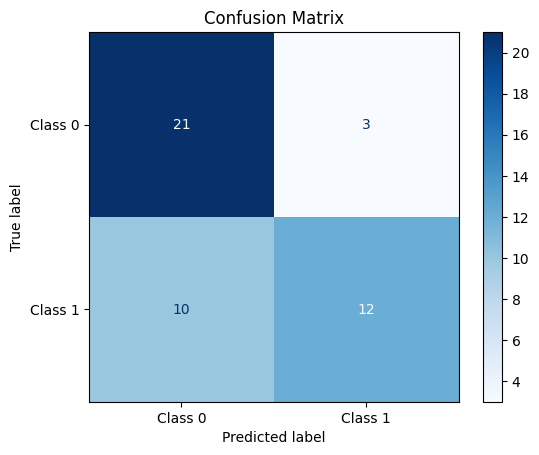

Sensitivity (Recall): 0.545
Specificity: 0.875
Positive Predictive Value (PPV): 0.8
Negative Predictive Value (NPV): 0.677
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.76        24
         1.0       0.80      0.55      0.65        22

    accuracy                           0.72        46
   macro avg       0.74      0.71      0.71        46
weighted avg       0.74      0.72      0.71        46

Accuracy: 0.717391304347826


In [92]:
df_train, df_test = train_test_split(Data1, test_size=0.2, random_state=42, stratify=data['Label'])
X_train = df_train.drop('Label', axis=1)
y_train = df_train['Label']

X_test = df_test.drop('Label', axis=1)
y_test = df_test['Label']

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test,y_pred_svm)

# CNN trail

In [93]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [95]:
base_dir = '/kaggle/input/monkeypox-skin-lesion-dataset/Augmented Images/Augmented Images'
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [96]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical', 
    subset='training'
)

Found 2555 images belonging to 2 classes.


In [97]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 637 images belonging to 2 classes.


In [33]:
test_data_gen  = train_datagen.flow_from_directory(
    '/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Test' , 
    target_size=(150 , 150) , 
    class_mode= 'categorical' , 
    batch_size=(16))
# this will be used only on the evaluating section

Found 45 images belonging to 2 classes.


[1. 0.]


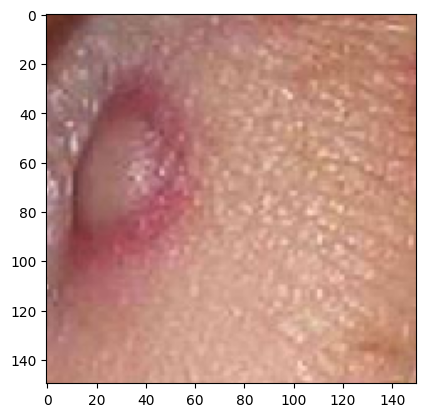

In [98]:
for image, label in train_generator:
    plt.imshow(image[0], vmin=0, vmax=1)
    print(label[0])
    break

In [29]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5881 - loss: 0.7064 - val_accuracy: 0.5385 - val_loss: 0.6870
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6048 - loss: 0.6515 - val_accuracy: 0.5432 - val_loss: 0.6953
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 79s 980ms/step - accuracy: 0.5868 - loss: 0.6719 - val_accuracy: 0.5243 - val_loss: 0.7122
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 80s 1000ms/step - accuracy: 0.5911 - loss: 0.6686 - val_accuracy: 0.5934 - val_loss: 0.6859
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 989ms/step - accuracy: 0.6900 - loss: 0.5874 - val_accuracy: 0.5385 - val_loss: 0.6947
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7051 - loss: 0.5679 - val_accuracy: 0.5636 - val_loss: 0.7979
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 80s 990ms/step - accuracy: 0.7398 - loss: 0.5188 - val_accuracy: 0.5432 - val_loss: 0.7867
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7617 - loss: 0.4839 - val_accuracy: 0.5714 - val_los

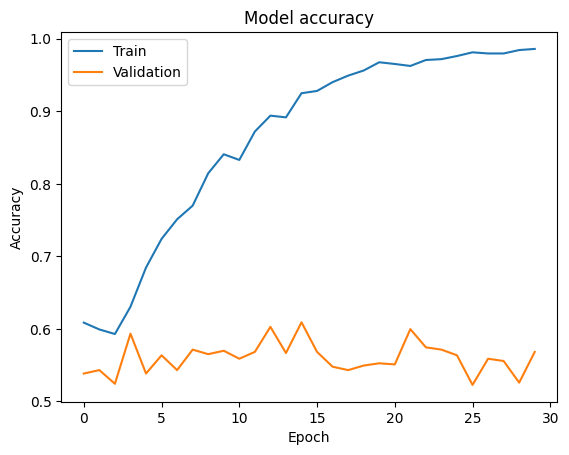

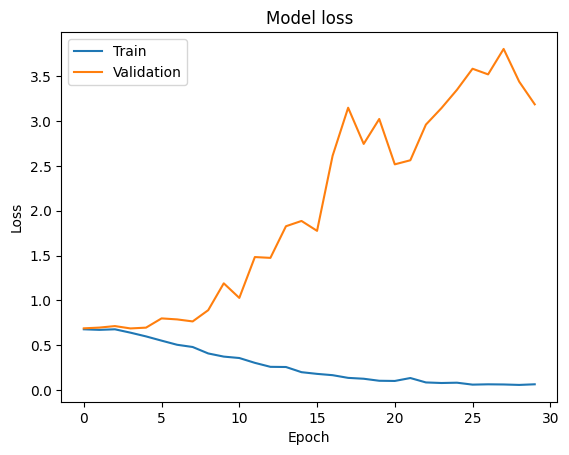

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
model.evaluate(test_data_gen)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9309 - loss: 0.1127


[0.0786888524889946, 0.9555555582046509]